# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [11]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd
import numpy as np
import sklearn as sk

## Dataset


In [12]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")


## EDA
Uncomment to see desired output. Add more analysis if you like

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    

/tmp/ipykernel_32674/493278327.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


   loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000 

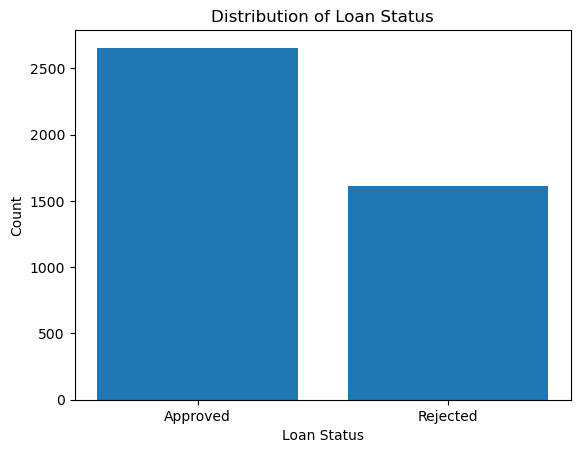

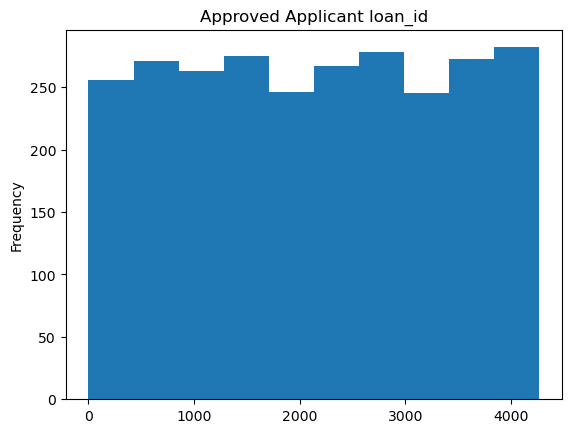

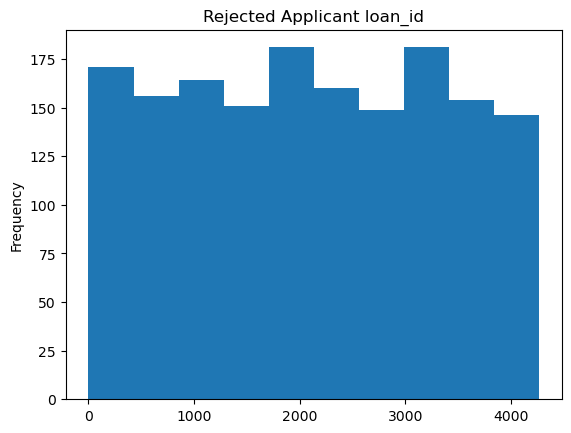

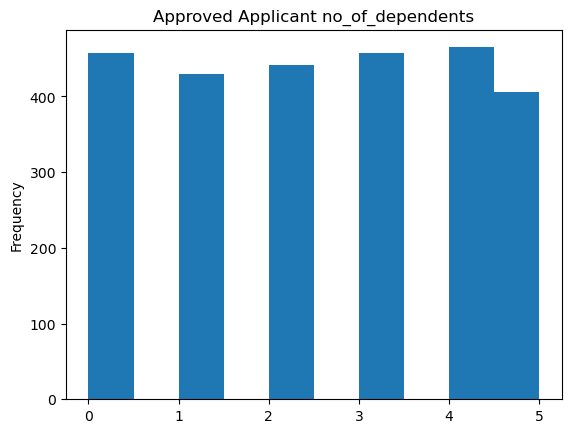

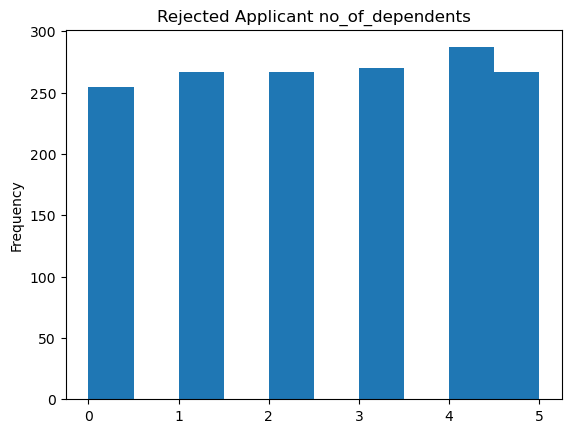

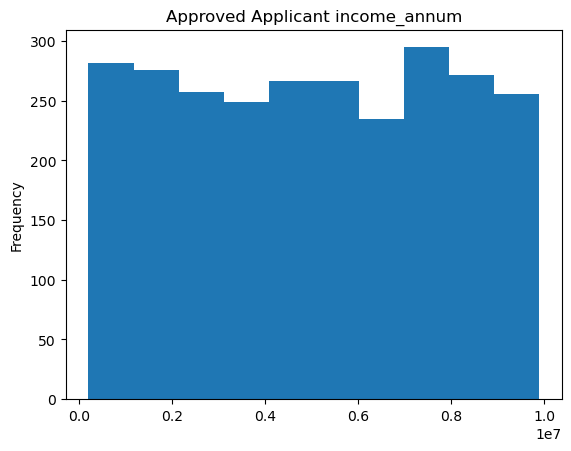

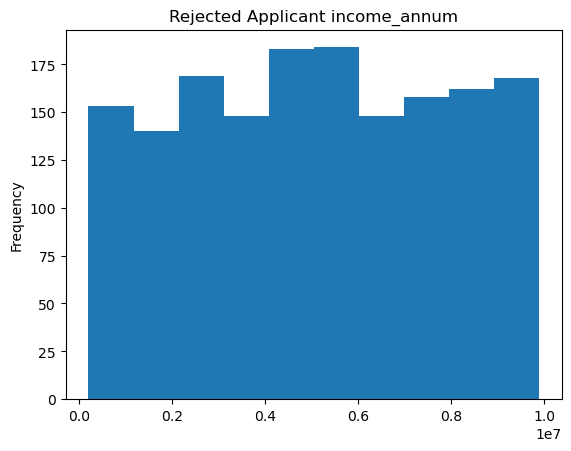

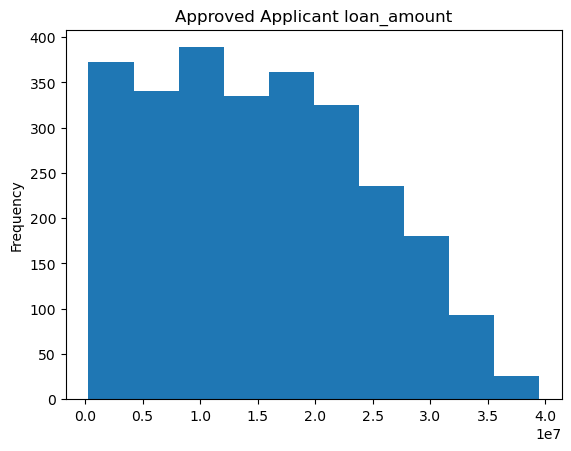

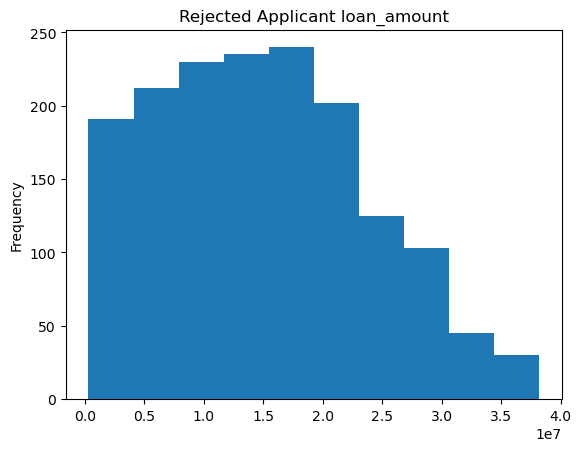

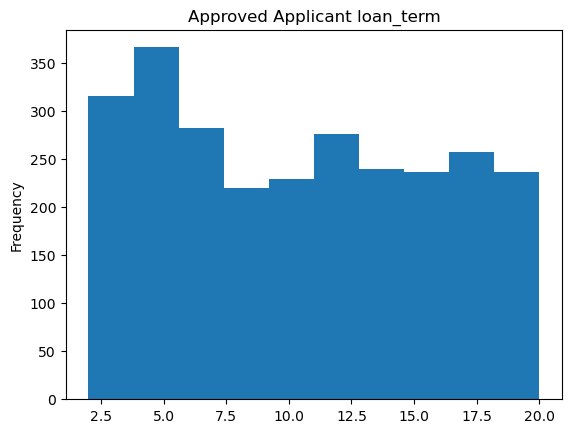

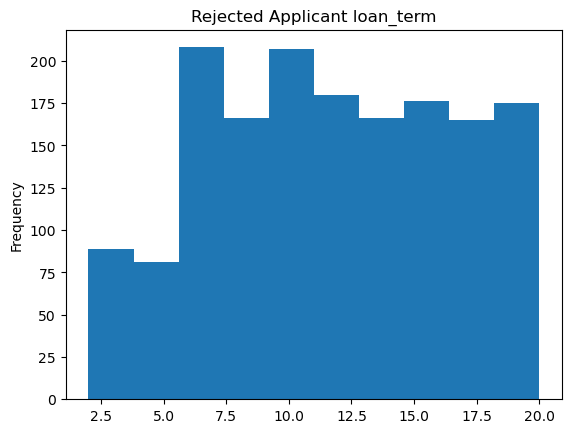

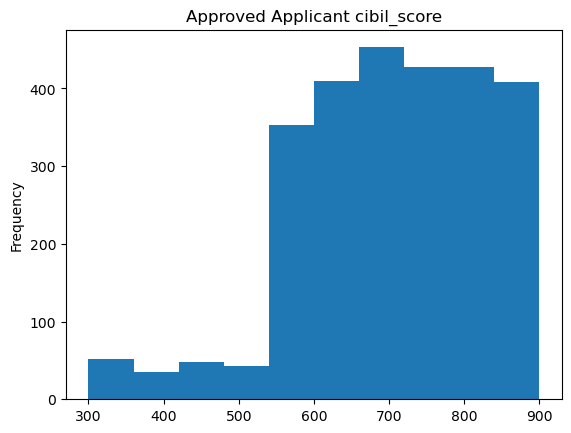

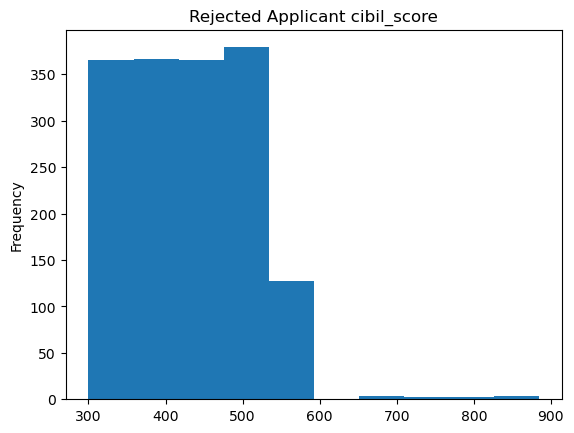

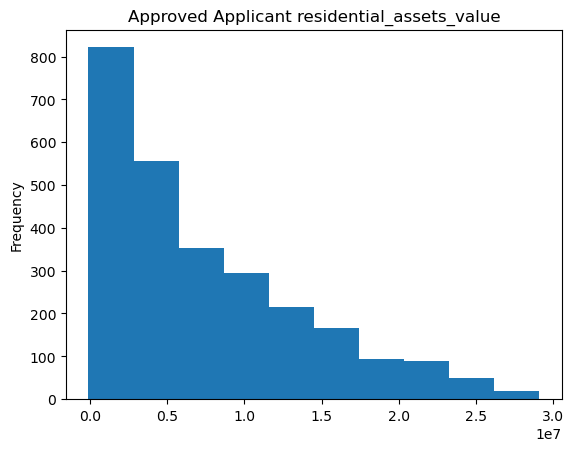

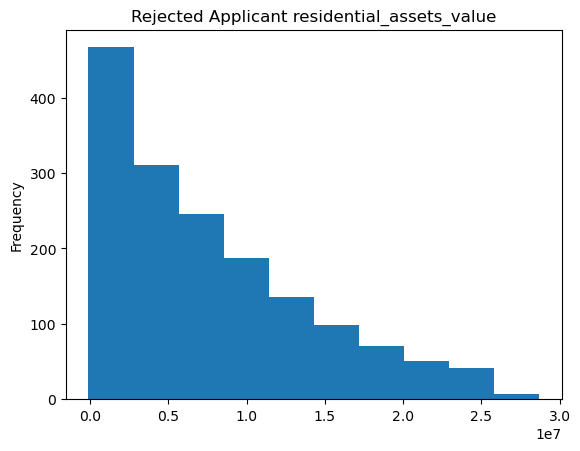

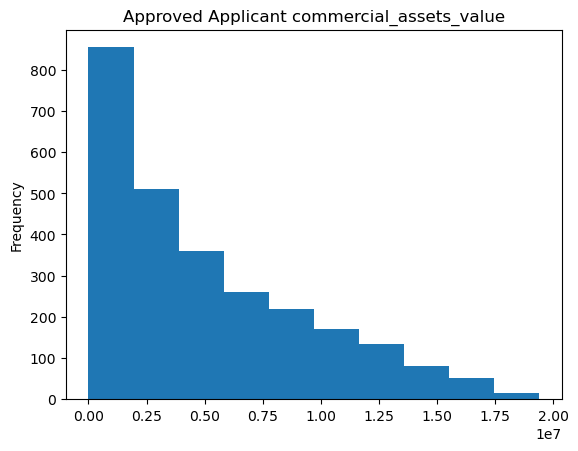

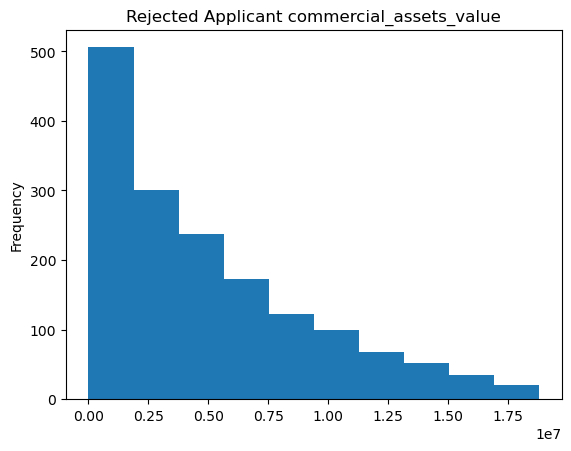

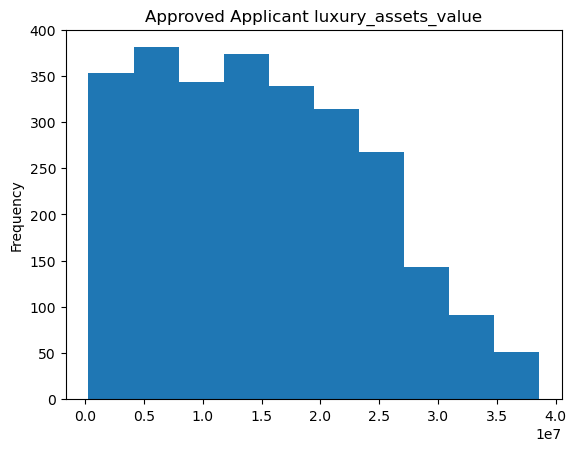

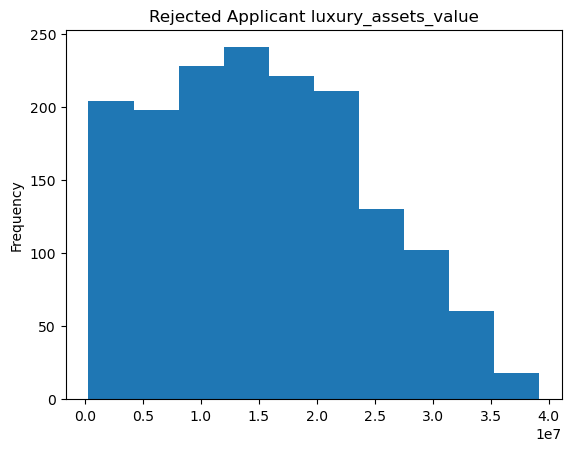

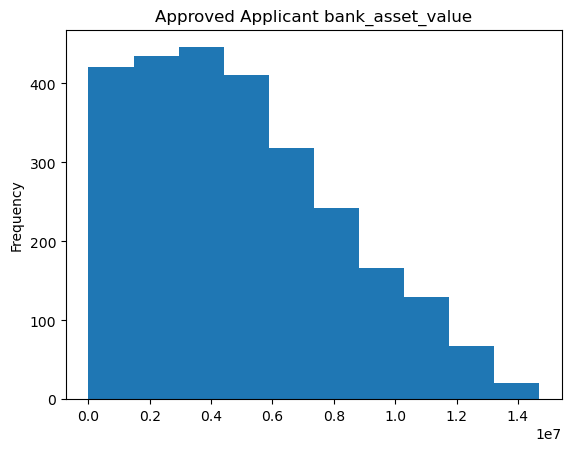

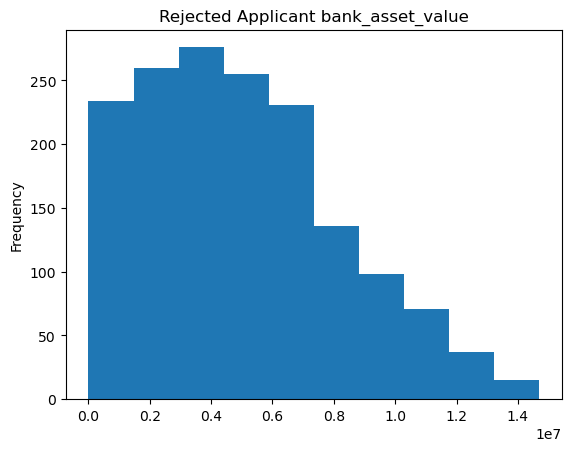

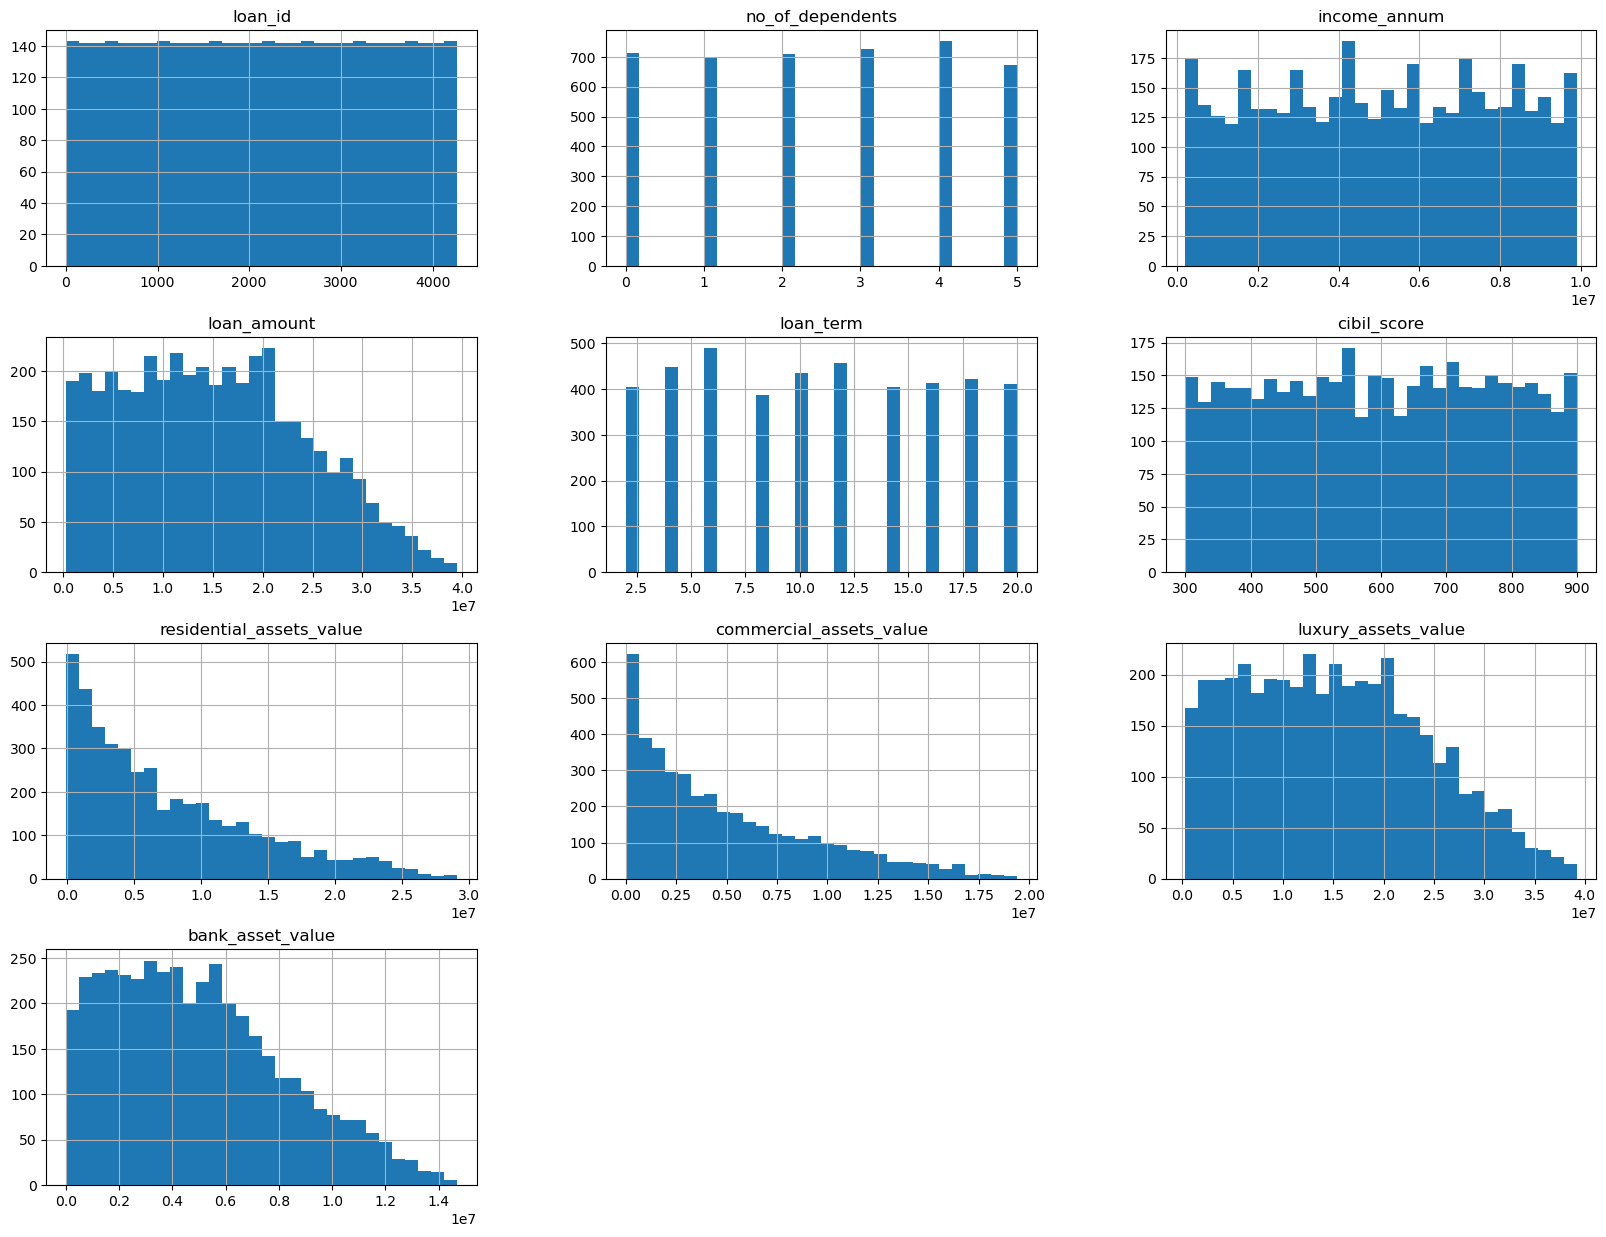

In [13]:

import matplotlib.pyplot as plt

# ------ Display basic information ------
print(loan_data.columns)
print(loan_data.describe())

# ------ Check for missing values ------
print(loan_data.isnull().sum())

# Separate applicants into approved applicants and rejected applicants
# I want to view which variables correlate most strongly with approval
# and with rejection
approved = loan_data[loan_data['loan_status'] == 'Approved']
rejected = loan_data[loan_data['loan_status'] == 'Rejected']

# ------ Visualize the distribution of loan status ------
plt.figure(0)
loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Compare annual income to loan status
# plt.figure(1)
# approved['income_annum'].plot.hist(title='Approved Loan Applicant Annual Income')
# plt.figure(2)
# rejected['income_annum'].plot.hist(title='Rejected Loan Applicant Annual Income')

# Compare size of loans for approved applicants versus rejected applicants
# plt.figure(3)
# approved['loan_amount'].plot.hist(title='Approved Applicant Loan Amount')
# plt.figure(4)
# rejected['loan_amount'].plot.hist(title='Rejected Applicant Loan Amount')

# Compare loan term for approved and rejected loan applicants
# plt.figure(5)
# approved['loan_term'].plot.hist(title='Approved Applicant Loan Term')
# plt.figure(6)
# rejected['loan_term'].plot.hist(title='Rejected Applicant Loan Term')

# Compare cibil score for approved and rejected loan applicants
# plt.figure(7)
# approved['cibil_score'].plot.hist(title='Approved Applicant CIBIL Score')
# plt.figure(8)
# rejected['cibil_score'].plot.hist(title='Rejected Applicant Cibil Score')

i = 1

for column in loan_data.columns:
    column_name = str(column)
    if approved[column_name].dtype == int:
        plt.figure(i)
        approved[column_name].plot.hist(title='Approved Applicant {}'.format(column_name))
        i += 1

    if rejected[column_name].dtype == int:
        plt.figure(i)
        rejected[column_name].plot.hist(title='Rejected Applicant {}'.format(column_name))
        i += 1

# ------ Visualize the distribution of numerical features ------ 
loan_data.hist(bins=30, figsize=(20, 15))


# ----- MORE (Encouraged but not required) ------
print(loan_data.head())


# ------ Correlation matrix ------
# corr_matrix = loan_data.corr()
# fig, ax = plt.subplots(figsize=(10, 8))
# cax = ax.matshow(corr_matrix, cmap='coolwarm')
# fig.colorbar(cax)
# plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [22]:
#loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})

# Convert self_employed and loan_status to numerical values
#loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})
#loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Rejected': 0})

# Total assets vs loan amount
loan_data['total_assets'] = loan_data['bank_asset_value'] + loan_data['commercial_assets_value'] + loan_data['luxury_assets_value'] + loan_data['residential_assets_value']
loan_data['total_assets_per_loan_amount'] = loan_data['total_assets'] / loan_data['loan_amount']

# Annual income vs loan ammount
loan_data['income_annum_per_loan_amount'] = loan_data['income_annum'] / loan_data['loan_amount']

# Cibil score vs loan amount
loan_data['cibil_score_per_loan_amount'] = loan_data['cibil_score'] / loan_data['loan_amount']

# Dependents vs annual income
loan_data['income_annum_per_dependent'] = loan_data['income_annum'] / (loan_data['no_of_dependents'] + 1)

loan_data.head(100)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,total_assets_per_loan_amount,income_annum_per_loan_amount,cibil_score_per_loan_amount,income_annum_per_dependent
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000,1.695652,0.321070,0.000026,3.200000e+06
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000,1.393443,0.336066,0.000034,4.100000e+06
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000,1.942761,0.306397,0.000017,2.275000e+06
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000,1.716612,0.267101,0.000015,2.050000e+06
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000,2.272727,0.404959,0.000016,1.633333e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,5,1,0,300000,1100000,2,300,100000,500000,700000,400000,1,1700000,1.545455,0.272727,0.000273,5.000000e+04
96,97,2,1,1,6600000,15000000,18,470,1200000,4800000,18200000,7000000,0,31200000,2.080000,0.440000,0.000031,2.200000e+06
97,98,2,0,0,8700000,25000000,20,861,14700000,8500000,23200000,7300000,1,53700000,2.148000,0.348000,0.000034,2.900000e+06
98,99,4,1,0,9400000,29400000,12,562,25900000,15200000,36400000,7100000,1,84600000,2.877551,0.319728,0.000019,1.880000e+06


## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [15]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
model = KernelRidge()

## Model Training and Evaluation

In [23]:
columns = ['cibil_score', 'total_assets_per_loan_amount', 'income_annum_per_loan_amount', 'income_annum_per_dependent']
X = loan_data[columns].dropna()
y = loan_data.loc[X.index]['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)


/usr/lib/python3/dist-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


0.5707577305843101

## Model Optimization and Testing